In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('SBN-Pt-Si.csv', header=-1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,542,543,544,545,546,547,548,549,550,551
0,300,449.055469,441.244192,498.055818,489.528183,515.200855,458.533248,384.820612,514.517550,487.394523,...,3931.038952,3842.094531,3614.893229,3518.864082,3307.659638,3235.237245,3036.645328,2860.778902,2618.900382,2338.872613
1,310,436.335973,459.601471,441.356111,452.613258,550.758365,558.877953,601.099381,585.954823,660.681847,...,7032.829189,6833.235065,6526.799937,6202.975008,6000.644480,5823.230486,5508.370669,5154.405264,4720.107584,4205.127147
2,320,278.758442,399.697189,455.825868,508.812565,495.154616,510.926216,481.811614,658.519417,533.463816,...,6969.965506,6844.842414,6486.206070,6308.961011,6034.862659,5858.896421,5546.318038,5155.890600,4730.268070,4232.430961
3,330,295.516306,314.063557,388.574218,329.990967,339.505268,457.221352,443.500599,320.130716,528.831785,...,6877.581230,6684.905461,6407.330901,6249.693841,5883.416496,5775.553655,5425.677398,5159.773345,4680.337790,4188.152753
4,340,373.388268,294.537897,361.416489,417.441949,425.577114,365.827936,426.429821,440.730123,561.357658,...,5466.831780,5282.264408,5055.631879,4927.051884,4703.270319,4602.689358,4248.626582,4065.856823,3755.967433,3370.030867


In [92]:
# Температуры
y = df[0]

In [93]:
df1 = df.drop([0], axis=1)
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,542,543,544,545,546,547,548,549,550,551
0,449.055469,441.244192,498.055818,489.528183,515.200855,458.533248,384.820612,514.517550,487.394523,587.504075,...,3931.038952,3842.094531,3614.893229,3518.864082,3307.659638,3235.237245,3036.645328,2860.778902,2618.900382,2338.872613
1,436.335973,459.601471,441.356111,452.613258,550.758365,558.877953,601.099381,585.954823,660.681847,630.044405,...,7032.829189,6833.235065,6526.799937,6202.975008,6000.644480,5823.230486,5508.370669,5154.405264,4720.107584,4205.127147
2,278.758442,399.697189,455.825868,508.812565,495.154616,510.926216,481.811614,658.519417,533.463816,626.534514,...,6969.965506,6844.842414,6486.206070,6308.961011,6034.862659,5858.896421,5546.318038,5155.890600,4730.268070,4232.430961
3,295.516306,314.063557,388.574218,329.990967,339.505268,457.221352,443.500599,320.130716,528.831785,431.775857,...,6877.581230,6684.905461,6407.330901,6249.693841,5883.416496,5775.553655,5425.677398,5159.773345,4680.337790,4188.152753
4,373.388268,294.537897,361.416489,417.441949,425.577114,365.827936,426.429821,440.730123,561.357658,609.491595,...,5466.831780,5282.264408,5055.631879,4927.051884,4703.270319,4602.689358,4248.626582,4065.856823,3755.967433,3370.030867


In [94]:
X_std = StandardScaler().fit_transform(df1)

In [95]:
X_std

array([[ 2.54729192,  2.39229399,  2.09599839, ...,  0.5512367 ,
         0.53083031,  0.53913761],
       [ 2.40232379,  2.59899269,  1.56425814, ...,  2.52931354,
         2.52047122,  2.52865031],
       [ 0.60636279,  1.92448436,  1.69995818, ...,  2.53059453,
         2.53009222,  2.55775742],
       ...,
       [-0.29373155, -1.27190425, -1.09360947, ..., -1.12399461,
        -1.11485336, -1.11248525],
       [ 0.16199615, -0.81781288, -0.73268934, ..., -0.56767932,
        -0.54150999, -0.5275456 ],
       [ 0.74982593,  0.6874978 ,  0.21309555, ..., -0.7230567 ,
        -0.71785807, -0.68597816]])

In [96]:
mean_vec = np.mean(X_std, axis=0)

In [97]:
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.025      0.79337792 0.75254414 ... 0.68620848 0.68738109 0.68525945]
 [0.79337792 1.025      0.85270353 ... 0.76047116 0.75866311 0.7586409 ]
 [0.75254414 0.85270353 1.025      ... 0.67536695 0.66975515 0.66906997]
 ...
 [0.68620848 0.76047116 0.67536695 ... 1.025      1.02479878 1.02455525]
 [0.68738109 0.75866311 0.66975515 ... 1.02479878 1.025      1.02463245]
 [0.68525945 0.7586409  0.66906997 ... 1.02455525 1.02463245 1.025     ]]


In [98]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

In [99]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
# eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# print('Eigenvalues in descending order:')
# for i in eig_pairs:
#     print(i[0])

In [100]:
pca = PCA(n_components=2)
X_reduced =pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.98245136 0.01014669]


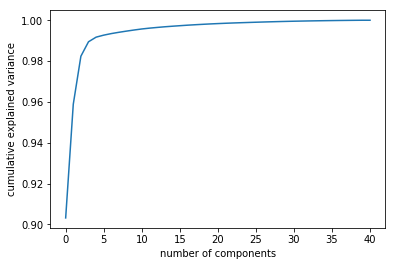

In [101]:
#Explained variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [102]:
X_reduced[y == 300]

array([[17685.55247283,  5004.83388699]])

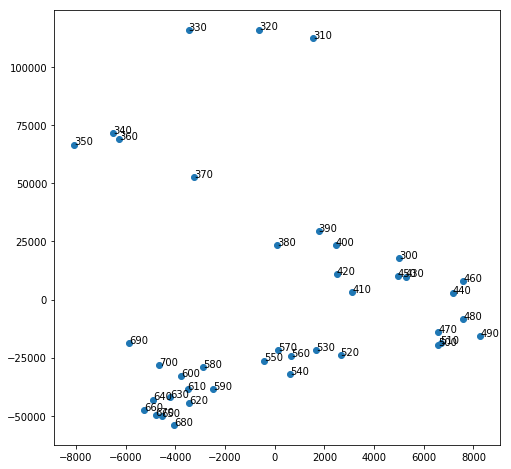

In [103]:
x = X_reduced[:, 0]
y = X_reduced[:, 1]
label = range(300, 710, 10)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y, x)

for i, txt in enumerate(label):
    ax.annotate(txt, (y[i], x[i]))
